In [1]:
from ipywidgets import interact, fixed, interactive, widgets, interact_manual
from IPython.display import display, clear_output

import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

import effPlotwidget as effplt
reload(effplt)
effplt.defaultWidgets()

import plotting as plotting

Welcome to ROOTaaS 6.06/08


In [2]:
w = interactive(effplt.GetDictionary,inputDir=effplt.widgetparams['w_inputDir'])
display(w)
#extract the dictionary with the classifier names found in the
#given directory plus the directory name
class_dict = w.result[0]
inDir = w.result[1]

fitterObject = interactive(effplt.GetFitter,
                           inputName=class_dict,
                            dataDir =effplt.widgetparams['w_dataDir'],
                            inputDir=fixed(inDir),
                            load = effplt.widgetparams['w_Load']
                          )

display(fitterObject)

entered config files named my_train_config
None
Load object with the name Train_Configurable_Refactor_higgs_model_dep_2273534 and the following paramters 
./classifiers
./classifiers/Train_Configurable_Refactor_higgs_model_dep_2273534.pkl.gz
loading pickle ./classifiers/Train_Configurable_Refactor_higgs_model_dep_2273534.pkl.gz
loading data ./classifiers/Train_Configurable_Refactor_higgs_model_dep_2273534.root
Index([u'absweight', u'class', u'genJet2p5Pt0', u'genJet2p5Pt1',
       u'genJet2p5Pt2', u'genJet2p5Pt3', u'genJet2p5Rapidity0',
       u'genJet2p5Rapidity1', u'genJet2p5Rapidity2', u'genJet2p5Rapidity3',
       u'genLeadGenIso', u'genNjets2p5', u'genPt', u'genRapidity',
       u'genSubleadGenIso', u'recoNjets2p5', u'recoPt', u'recoRapidity',
       u'weight', u'proc', u'absGenRapidity', u'absGenJet2p5Rapidity0',
       u'absGenJet2p5Rapidity1', u'absGenJet2p5Rapidity2',
       u'absGenJet2p5Rapidity3', u'class_prob_0', u'class_prob_1',
       u'class_prob_2', u'class_prob_3'],
 

In [3]:
df = fitterObject.result.df

In [4]:
first_train_evt = int(round(df.index.size*(1.-fitterObject.result.split_frac)))
#take the test sample 
df_test = df[:first_train_evt]

In [5]:
def GetProdProcName (n) :
    if (n==0) :
        return 'ggF'
    if (n==1) :
        return 'ttH'
    if (n==2) :
        return 'VBF'
    if (n==3) :
        return 'VH'
    

In [6]:
class_list = ['class']#,'recoPt','recoNjets2p5']


In [7]:
save_directory = './plots/totEffperCat/4classGenIsoVars'

There are 4 features of type class
['class_prob_0', 'class_prob_1', 'class_prob_2', 'class_prob_3']
[ 6.30997133  2.07070017  2.65323448  4.41288662]
6.30993
2.0707
2.65321
4.41288
[ 0.003034    0.00101622  0.00123233  0.002075  ]
[45669 14993 18862 31935]
[12821  4353  5222  8869]
[ 6.30292625  2.07980682  2.62740079  4.41795807]
[ 0.00019188  0.00019547  0.00019262  0.00019154]
('sum of weights: ', 15.446718)
('sum of absweights: ', 27.459312)
('sellam pos', array([ 40893.,  10778.,  14016.,  27126.]))
('sellam neg', array([ 40445.,  10502.,  13708.,  26744.]))
('errpos', array([ 0.09993627,  0.00174632,  0.00468882,  0.050343  ]))
('errneg', array([-0.09437114,  0.00174632, -0.00084798, -0.0456063 ]))
There are 4 features of type class
['class_prob_0', 'class_prob_1', 'class_prob_2', 'class_prob_3']
[ 0.06598005  0.0225905   0.02411994  0.03118408]
0.0659803
0.0225901
0.02412
0.0311839
[  3.16079922e-06   1.20696177e-06   1.15500097e-06   1.35687606e-06]
[14430  5303  5383  6392]
[7

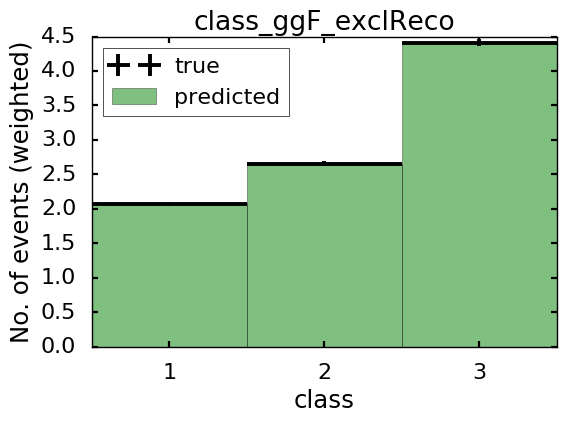

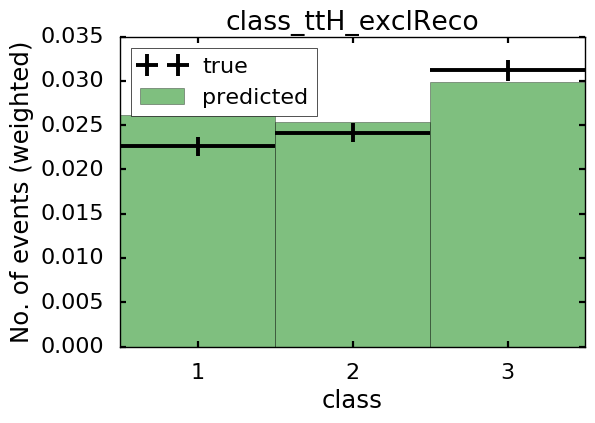

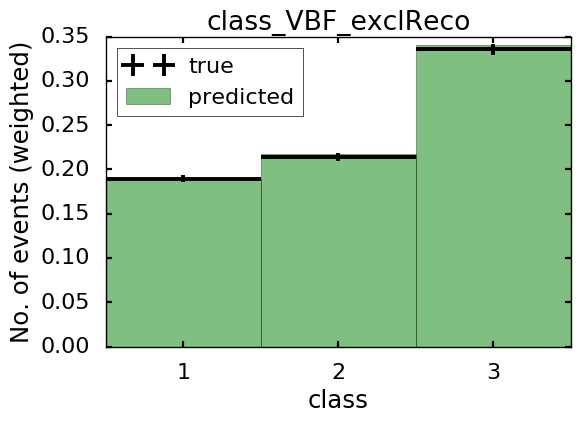

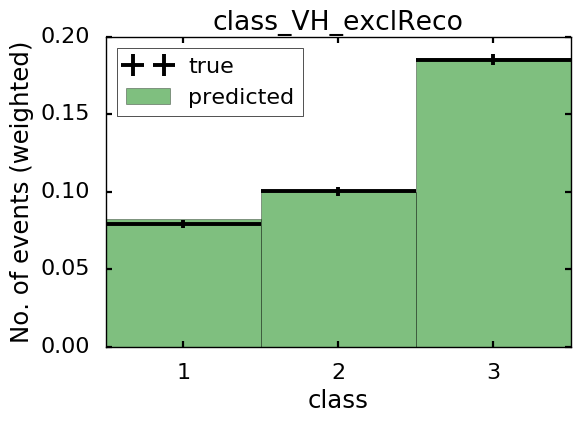

In [21]:
for cl in class_list :
    for prod_mech in xrange(4) :
        plotting.naive_closure(df_test[df_test['proc']==prod_mech],
                               column = cl, logy=False, absolute=False,first=1,
                       savepath=save_directory,title=cl+'_'+GetProdProcName(prod_mech)+'_exclReco')

In [19]:
reload(plotting)

<module 'plotting' from 'plotting.py'>

In [20]:
plotting.naive_closure(df_test,'recoNjets2p5',logy=False,absolute=False,first=1,
                       title='recoNjets2p5')

KeyError: 'recoNjets2p5Cat'

In [35]:
import numpy as np

number of weights in the process ttH: 48628
number of weights in the process VBF: 170897
number of weights in the process VH: 33723


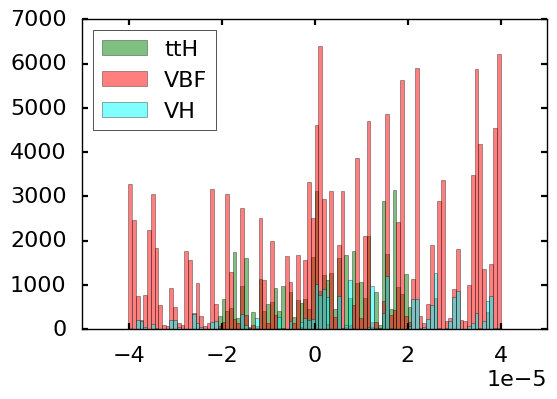

In [44]:
colors = ['green','red','cyan']
for prodmech in np.arange(1,4,1) :
    print('number of weights in the process '+ GetProdProcName(prodmech) + ': ' +
          str(len(df_test[df_test['proc']==prodmech]['weight'])))
    plt.hist(df_test[df_test['proc']==prodmech]['weight'],bins=100,label=GetProdProcName(prodmech),range=[-4e-5,4e-5]
            ,alpha=.5,color=colors[prodmech-1])
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(loc='best')
plt.show()

weights for ggF
111459
31265
weights for ttH
31508
17120
weights for VBF
111412
59485
weights for VH
26676
7047


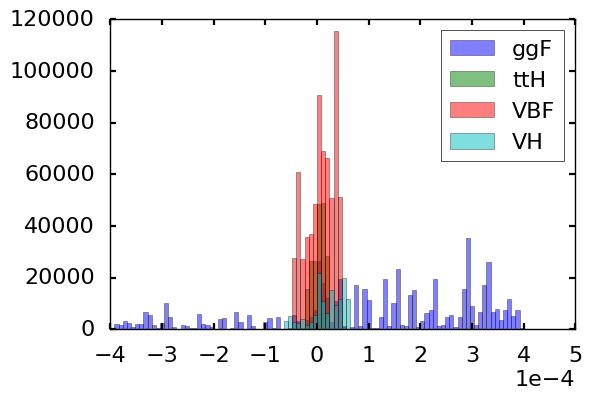

In [41]:
for prodmech in xrange(4) :
    print('weights for ' + str(GetProdProcName(prodmech)))
    print(df_test[(df_test['proc']==prodmech) & (df_test['weight']>=0 ) ]['weight'].count())
    print(df_test[(df_test['proc']==prodmech) & (df_test['weight']<0 ) ]['weight'].count())
    plt.hist(df[df['proc']==prodmech]['weight'],bins=100,label=GetProdProcName(prodmech),range=[-4e-4,4e-4]
            ,alpha=.5)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(loc='best')
plt.show()

# Investigating error bars on VBF

In [10]:
df_VBF = df_test[df_test['proc']==2]
df_ggF = df_test[df_test['proc']==0]

In [11]:
df_VBF['weight'].count()

170897

In [12]:
df_ggF['weight'].count()

142724

In [15]:
reload(plotting)

<module 'plotting' from 'plotting.py'>

There are 4 features of type class
['class_prob_0', 'class_prob_1', 'class_prob_2', 'class_prob_3']
[ 0.46447617  0.18965793  0.21373951  0.33549815]
0.464475
0.189658
0.213743
0.335498
[  4.97007240e-05   2.00794930e-05   2.26736156e-05   3.52912757e-05]
[43550 17073 19673 31116]
[23135  9112 10589 16649]
[ 0.47053164  0.18791936  0.21142308  0.33404693]
[  2.30483292e-05   2.36049946e-05   2.32742277e-05   2.30902697e-05]
('sum of weights: ', 1.2033739)
('sum of absweights: ', 3.9623058)
('sellam pos', array([ 38769.,  12221.,  14829.,  26305.]))
('sellam neg', array([ 38331.,  11925.,  14517.,  25927.]))
('errpos', array([ 0.35153582,  0.08356279,  0.11111296,  0.22714687]))
('errneg', array([-0.34314677, -0.07775655, -0.10507863, -0.21989382]))


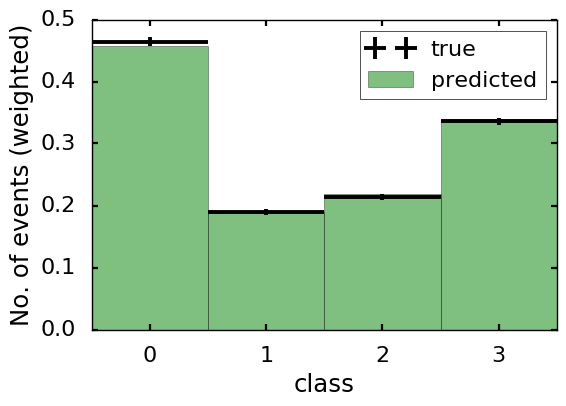

In [16]:
plotting.naive_closure(df_VBF,'class',first=0,absolute=False)

There are 4 features of type class
['class_prob_0', 'class_prob_1', 'class_prob_2', 'class_prob_3']
[ 6.30997133  2.07070017  2.65323448  4.41288662]
6.30993
2.0707
2.65321
4.41288
[45669 14993 18862 31935]
[12821  4353  5222  8869]
[ 6.30292625  2.07980682  2.62740079  4.41795807]
[ 0.00019188  0.00019547  0.00019262  0.00019154]
('sum of weights: ', 15.446718)
('sum of absweights: ', 27.459312)
('sellam pos', array([ 40893.,  10778.,  14016.,  27126.]))
('sellam neg', array([ 40445.,  10502.,  13708.,  26744.]))
('errpos', array([ 0.09993627,  0.00174632,  0.00468882,  0.050343  ]))
('errneg', array([-0.09437114,  0.00174632, -0.00084798, -0.0456063 ]))


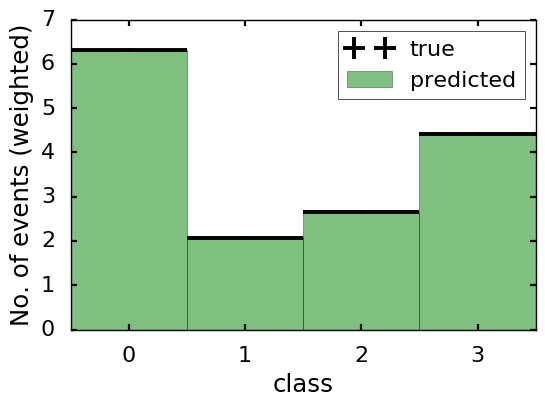

In [72]:
plotting.naive_closure(df_ggF,'class',first=0,absolute=False)